# Problem Statement

### Salary_Hike : Build a prediction model for Salary Hike

### Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('Darkgrid')
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

### EDA

In [48]:
df=pd.read_csv('Salary_Data.csv')

In [49]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
# Checking shape of data
df.shape

(30, 2)

In [51]:
# Data type
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [52]:
# Checking description of the data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [53]:
# Null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

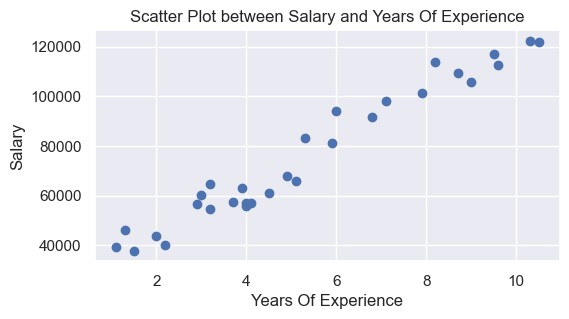

In [54]:
# Checking relationship between dependable and independent variables
plt.figure(figsize=(6,3))
plt.scatter(data=df,y='Salary',x='YearsExperience')
plt.title("Scatter Plot between Salary and Years Of Experience")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.show()

<Axes: >

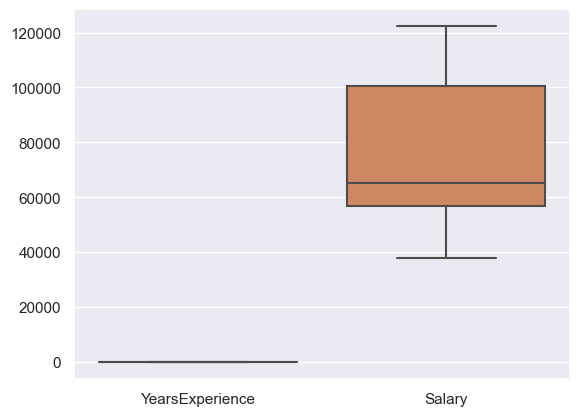

In [55]:
# Checking for outliers
sns.boxplot(data=df,)

In [62]:
df.corr()  #  Checking Correlation between variables

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


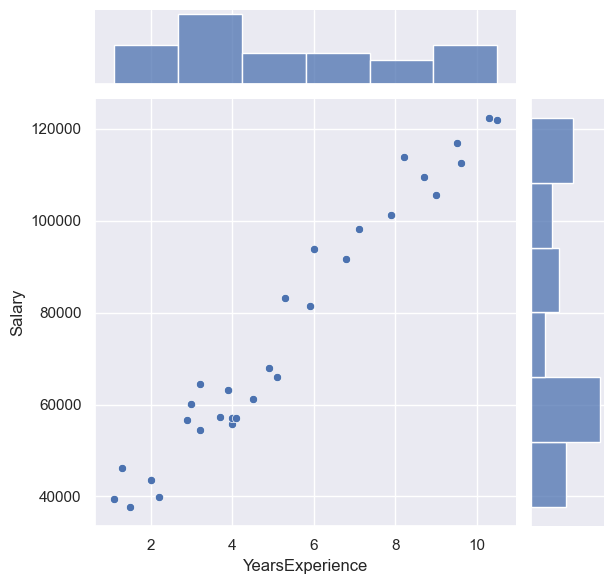

In [65]:
sns.jointplot(df,y='Salary',x='YearsExperience')   # Checking correlation between independent and dependent variable.

### Model Building

In [115]:
X=df.iloc[:,0].values   # YearsExperience
y=df.iloc[:,1].values   # Salary

In [116]:
X,y

(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]))

In [117]:
model=smf.ols("y~X",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        17:24:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model.params

Intercept    25792.200199
X             9449.962321
dtype: float64

In [119]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [120]:
model.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

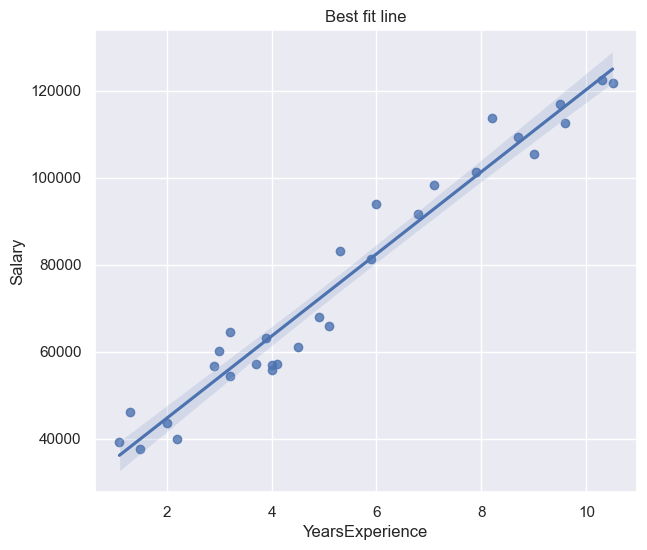

In [121]:
# Best fit line
plt.figure(figsize=(7,6))
sns.regplot(data=df,x='YearsExperience',y='Salary')
plt.title("Best fit line")
plt.show()

In [122]:
prediction=pd.DataFrame()
prediction['YearsExperience']=X
prediction['Salary']=y
prediction['Predicted_Salary_Hike']=model.predict()
prediction

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


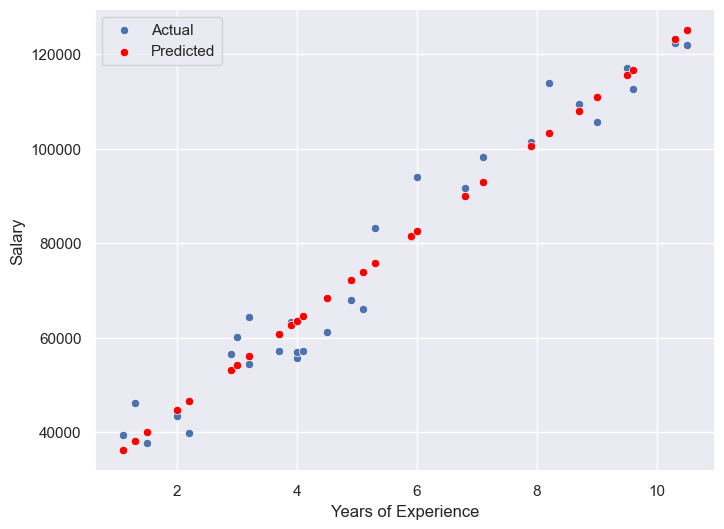

In [127]:
# Create a scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, label='Actual') 
sns.scatterplot(x=X,y=prediction.Predicted_Salary_Hike, color='red', label='Predicted')
plt.ylabel('Salary')
plt.xlabel('Years of Experience')
plt.legend()
plt.show()

In [137]:
#Using log function for Salary to increase r-squared value:-
model3 = smf.ols('np.log(y)~X',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.03e-18
Time:                        17:39:02   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
X              0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
pred=model3.predict()

In [139]:
prediction1=pd.DataFrame()
prediction1['YearsExperience']=X
prediction1['Salary']=y
prediction1['Predicted_Salary_Hike']=pd.DataFrame(pred)
prediction1

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,10.645400
1,1.3,46205.0,10.670491
2,1.5,37731.0,10.695581
3,2.0,43525.0,10.758308
4,2.2,39891.0,10.783398
5,2.9,56642.0,10.871215
6,3.0,60150.0,10.883761
7,3.2,54445.0,10.908851
8,3.2,64445.0,10.908851
9,3.7,57189.0,10.971578


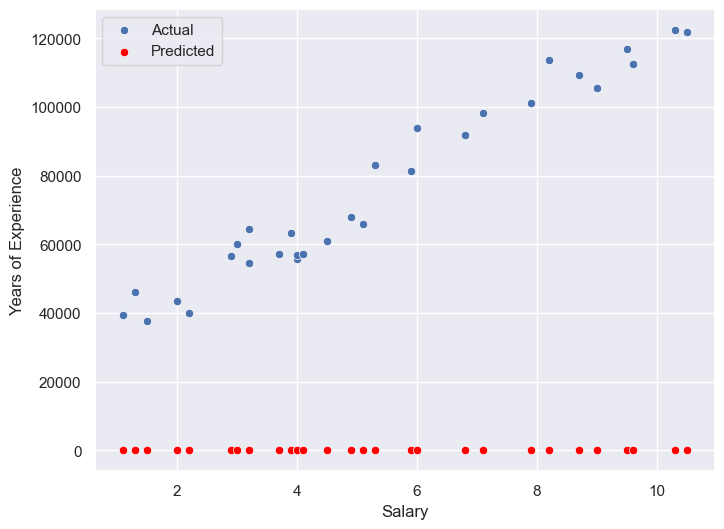

In [140]:
# Create a scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, label='Actual') 
sns.scatterplot(x=X,y=prediction1.Predicted_Salary_Hike, color='red', label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.legend()
plt.show()

## Hence we will consider first model. No transformation needed in data.